# 02 - Neural Network for classification problem Exercices 

1. Play with neural networks in the TensorFlow Playground for 10-minutes. Especially try different values of the learning, what happens when you decrease it? What happens when you increase it?
2. Replicate the model pictured in the TensorFlow Playground diagram below using TensorFlow code. Compile it using the Adam optimizer, binary crossentropy loss and accuracy metric. Once it's compiled check a summary of the model.

<center><img src="../images/02-tensorflow-playground-replication-exercise.png" width=650px></center>

3. Create a classification dataset using Scikit-Learn's make_moons() function, visualize it and then build a model to fit it at over 85% accuracy.
4. Create a function (or write code) to visualize multiple image predictions for the fashion MNIST at the same time. Plot at least three different images and their prediciton labels at the same time. Hint: see the classifcation tutorial in the TensorFlow documentation for ideas.
5. Recreate TensorFlow's softmax activation function in your own code. Make sure it can accept a tensor and return that tensor after having the softmax function applied to it.
6. Train a model to get 88%+ accuracy on the fashion MNIST test set. Plot a confusion matrix to see the results after.
7. Make a function to show an image of a certain class of the fashion MNIST dataset and make a prediction on it. For example, plot 3 images of the T-shirt class with their predictions.

In [1]:
# import librairies
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 80 from C header, got 88 from PyObject


### 2. Replicate the model pictured in the TensorFlow Playground diagram below using TensorFlow code. Compile it using the Adam optimizer, binary crossentropy loss and accuracy metric. Once it's compiled check a summary of the model.

<center><img src="../images/02-tensorflow-playground-replication-exercise.png" width=650px></center>

In [18]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_playground = tf.keras.Sequential([
    tf.keras.layers.Dense(6,activation="relu",input_shape=(2,)),
    tf.keras.layers.Dense(6,activation="relu"),
    tf.keras.layers.Dense(6,activation="relu"),
    tf.keras.layers.Dense(6,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# Compile
model_playground.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                         optimizer = tf.keras.optimizers.Adam(),
                         metrics = ["accuracy"])

In [19]:
# Check the summary
model_playground.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 6)                 18        
                                                                 
 dense_36 (Dense)            (None, 6)                 42        
                                                                 
 dense_37 (Dense)            (None, 6)                 42        
                                                                 
 dense_38 (Dense)            (None, 6)                 42        
                                                                 
 dense_39 (Dense)            (None, 1)                 7         
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


### 3. Create a classification dataset using Scikit-Learn's make_moons() function, visualize it and then build a model to fit it at over 85% accuracy.

In [20]:
# Import dataset 
from sklearn.datasets import make_moons

In [38]:
# Create the dataset
X, y = make_moons(n_samples=1000,noise=0.05, random_state=42)

In [39]:
# Check the Shape of the dataset
print(f"Features Shape : {X.shape}")
print(f"Labels Shape : {y.shape}")

Features Shape : (1000, 2)
Labels Shape : (1000,)


In [40]:
# Visualize the Data
print("Features :",X[:10],sep="\n",end="\n")
print("Labels :",y[:10],sep="\n")

Features :
[[-0.02137124  0.40618608]
 [ 0.97670045 -0.45832306]
 [ 0.90405882 -0.37651952]
 [ 0.37736316 -0.39703717]
 [-0.84192557  0.53058695]
 [ 0.58930337 -0.32137599]
 [ 0.29248724 -0.20696309]
 [-0.02637836  0.44766267]
 [ 1.6201408  -0.28758856]
 [ 0.68246733  0.80712069]]
Labels :
[1 1 1 1 0 1 1 1 1 0]


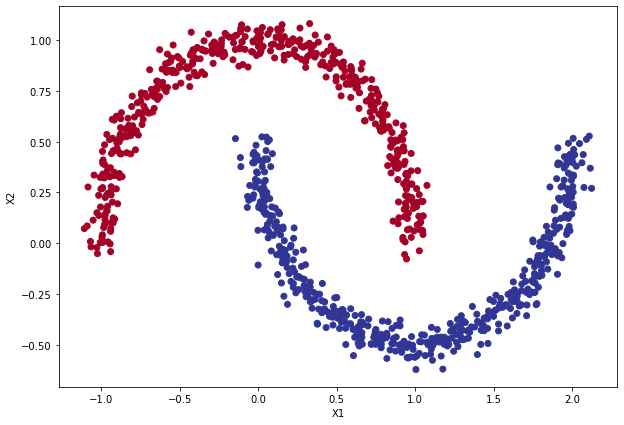

In [44]:
# Let's plot a figure of our data
plt.figure(figsize=(10,7))
plt.scatter(X[:,0],X[:,1],c=y, cmap=plt.cm.RdYlBu)
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

Now that we're familiar with the dataset. We can try to build a first model to classify the data. 

Before creating our model we need to split the data into a Train and test set.

In [45]:
# Split the dataset into a training set and a test set
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [47]:
# Shapes
print(f"Features Shape of the training set: {X_train.shape}")
print(f"Labels Shape of the training set: {y_train.shape}")
print(f"Features Shape of the test set: {X_test.shape}")
print(f"Labels Shape of the test set: {y_test.shape}")

Features Shape of the training set: (800, 2)
Labels Shape of the training set: (800,)
Features Shape of the test set: (200, 2)
Labels Shape of the test set: (200,)


First let's try a small model with 1 or 2 layers using:
- **Activation** : "relu"
- **Number of units** : 4
- **Optimizer** : Adam

In [48]:
# set random seed
tf.random.set_seed(42)

# Create model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# Compile the model
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# Fit
history_1 = model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 5s 2ms/step - loss: 0.6504 - accuracy: 0.6463
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6244 - accuracy: 0.7500
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.5990 - accuracy: 0.8650
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.5747 - accuracy: 0.8763
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.5515 - accuracy: 0.8737
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5288 - accuracy: 0.8725
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.5071 - accuracy: 0.8725
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.4863 - accuracy: 0.8725
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4671 - accuracy: 0.8700
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 0.4492 - accuracy: 0.8700
Epoch 11/

In [49]:
# Evaluate our model
model_1.evaluate(X_test,y_test)

7/7 [==============================] - 2s 2ms/step - loss: 0.2412 - accuracy: 0.8950


[0.24120382964611053, 0.8949999809265137]

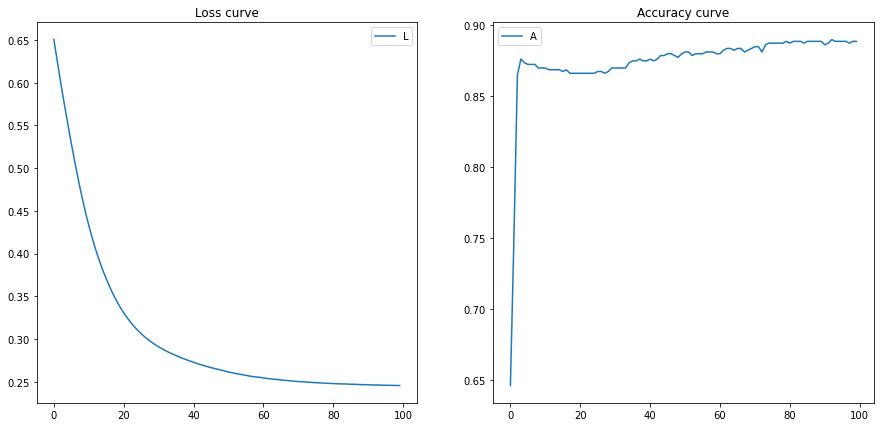

In [67]:
# See the learning curves
fig,axs = plt.subplots(1,2,figsize=(15,7))
pd.DataFrame(history_1.history["loss"]).plot(ax=axs[0],title="Loss curve")
axs[0].legend("Loss")
pd.DataFrame(history_1.history["accuracy"]).plot(ax=axs[1],title="Accuracy curve")
axs[1].legend("Accuracy")
plt.show()

We got a loss of 0.24 and an accuracy of 89%. Not bad! Let's try to improve our result by adding more hidden layers and neurons.

In [68]:
# set random seed
tf.random.set_seed(42)

# Create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(6,activation="relu"),
    tf.keras.layers.Dense(6,activation="relu"),
    tf.keras.layers.Dense(6,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# Compile
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit
history_2 = model_2.fit(X_train,y_train,epochs = 100)

Epoch 1/100
25/25 [==============================] - 0s 956us/step - loss: 0.6639 - accuracy: 0.5312
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6438 - accuracy: 0.7337
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6170 - accuracy: 0.8450
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.5837 - accuracy: 0.8587
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.5442 - accuracy: 0.8625
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4996 - accuracy: 0.8550
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4553 - accuracy: 0.8637
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.4145 - accuracy: 0.8700
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3794 - accuracy: 0.8763
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3471 - accuracy: 0.8875
Epoch 1

In [69]:
# Evaluate our model
model_2.evaluate(X_test,y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.2123 - accuracy: 0.8850


[0.21226367354393005, 0.8849999904632568]

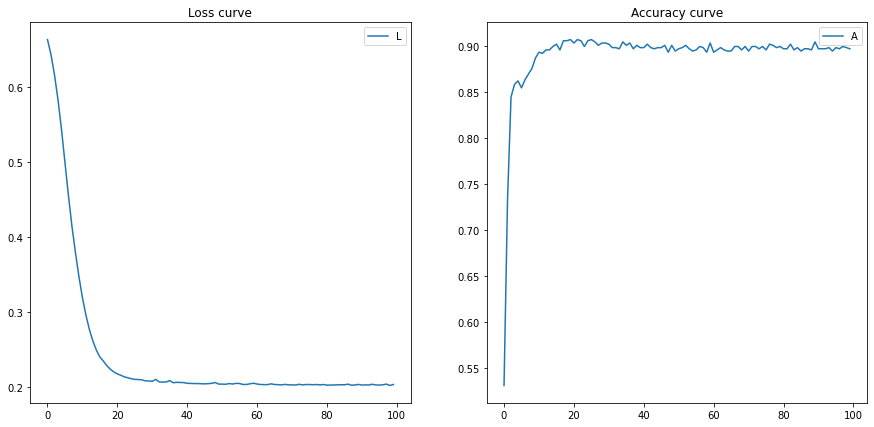

In [70]:
# See the learning curves
fig,axs = plt.subplots(1,2,figsize=(15,7))
pd.DataFrame(history_2.history["loss"]).plot(ax=axs[0],title="Loss curve")
axs[0].legend("Loss")
pd.DataFrame(history_2.history["accuracy"]).plot(ax=axs[1],title="Accuracy curve")
axs[1].legend("Accuracy")
plt.show()

According to the learning curves, it seems our model_2 performs a little better than the model_1. Let's plot some predictions to compare the two models

In [103]:
from numpy import meshgrid
from numpy import hstack

# plot predictions
def plot_predictions_map(X,y, model):

    # Min & max
    min1, max1 = X[:,0].min() - 0.1 , X[:,0].max() + 0.1
    min2, max2 = X[:,1].min() - 0.1 , X[:,1].max() + 0.1

    # define the x and y scale
    x1grid = np.linspace(min1,max1,100)
    x2grid = np.linspace(min2,max2,100)

    # Create all the lines and row of the grid
    xx, yy = meshgrid(x1grid, x2grid)

    # flatten each grid to a vector
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((r1.shape[0],1)),r2.reshape((r2.shape[0],1))

    # horizontal stack vectors to create x1,x2 input for the model
    grid = hstack((r1,r2))

    # make predictions
    y_pred = model.predict(grid)

    # add classes to predictions
    y_pred[y_pred>=0.5] = 1
    y_pred[y_pred<0.5] = 0

    # reshape
    y_pred = y_pred.reshape(xx.shape)

    # plot
    plt.contourf(xx,yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())
    

Text(0.5, 1.0, 'Test model_2')

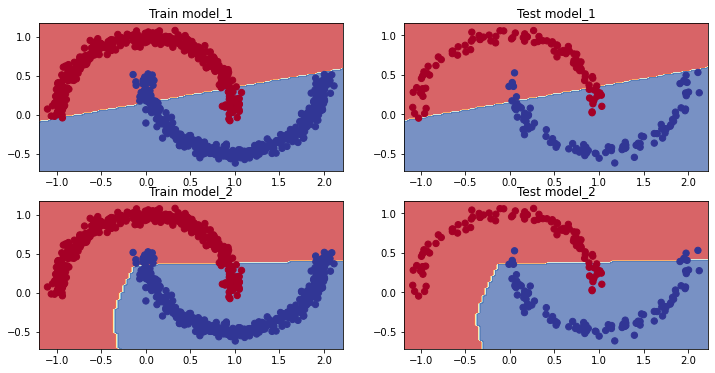

In [110]:
plt.figure(figsize = (12,6))
plt.subplot(2,2,1)
plot_predictions_map(X_train ,y_train,model_1)
plt.title("Train model_1")
plt.subplot(2,2,2)
plot_predictions_map(X_test ,y_test,model_1)
plt.title("Test model_1")
plt.subplot(2,2,3)
plot_predictions_map(X_train ,y_train,model_2)
plt.title("Train model_2")
plt.subplot(2,2,4)
plot_predictions_map(X_test ,y_test,model_2)
plt.title("Test model_2")

As we can see the model_2 has better results thant the first model  when we visualize the boundary decision made by our models.

Let's try to find the best learning rate in order to improve our model if possible.

### 4. Create a function (or write code) to visualize multiple image predictions for the fashion MNIST at the same time. Plot at least three different images and their prediciton labels at the same time. Hint: see the classifcation tutorial in the TensorFlow documentation for ideas.

### 5. Recreate TensorFlow's softmax activation function in your own code. Make sure it can accept a tensor and return that tensor after having the softmax function applied to it.

### 6. Train a model to get 88%+ accuracy on the fashion MNIST test set. Plot a confusion matrix to see the results after.

### 7. Make a function to show an image of a certain class of the fashion MNIST dataset and make a prediction on it. For example, plot 3 images of the T-shirt class with their predictions.